In [1]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page
    given a wikipedia page title
    '''

    params = {
        'action': 'query',
        'format': 'json', # request json formatted content
        'titles': title, # title of the wikipedia page
        'prop': 'extracts',
        'explaintext': True
    }

    # send a request to the wikipedia api
    response = requests.get(
        'https://en.wikipedia.org/w/api.php',
        params= params
    ).json()

    # Parse the result
    page = next(iter(response['query']['pages'].values()))


    # return the page content
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"
    # first get the text from the wikipedia page with

In [2]:
text = wikipedia_page('Earth').lower()

In [3]:
from wordcloud import WordCloud


# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
   random_state = 8,
   normalize_plurals = False,
   width = 600,
   height= 300,
   max_words = 300,
   stopwords = []
)

# Apply the wordcloud to the text.
wordcloud.generate(text)

(-0.5, 599.5, 299.5, -0.5)

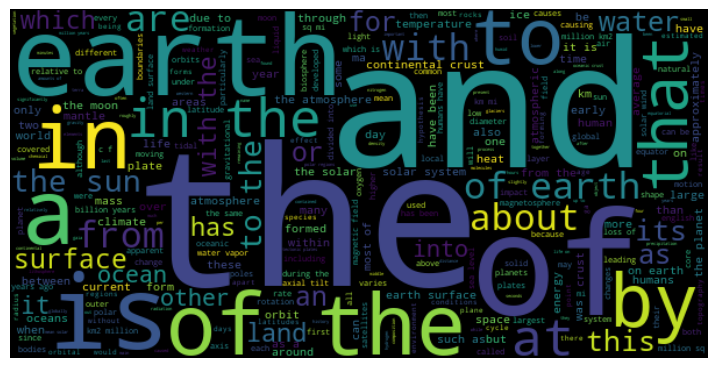

In [4]:
# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [5]:
from collections import Counter

# we transform the text into a list of words 
# by splitting over the space character ' '
word_list = text.split(' ')

# and count the words
word_counts = Counter(word_list)

In [6]:
for w in word_counts.most_common(20):
   print(f"{w[0]}:  \t{w[1]} ")

the:  	705 
of:  	364 
and:  	284 
is:  	173 
to:  	166 
in:  	149 
a:  	136 
earth's:  	117 
by:  	76 
with:  	74 
earth:  	69 
from:  	69 
as:  	69 
at:  	59 
that:  	59 
are:  	50 
surface:  	44 
it:  	43 
about:  	43 
this:  	42 


In [7]:
# transform the text into a list of words
words_list = text.split(' ')

# define the list of words you want to remove from the text
stopwords = ['the', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']

# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word not in stopwords ]

In [8]:
Counter(words_without_stopwords).most_common(20)

[("earth's", 117),
 ('earth', 69),
 ('surface', 44),
 ('it', 43),
 ('about', 43),
 ('solar', 40),
 ('has', 39),
 ('on', 39),
 ('million', 36),
 ('water', 35),
 ('which', 35),
 ('have', 35),
 ('into', 32),
 ('or', 31),
 ('crust', 27),
 ('most', 27),
 ('land', 27),
 ('life', 27),
 ('sun', 26),
 ('been', 25)]

In [9]:
# transform the text into a list of words
words_list = text.split(' ')

# define the list of words you want to remove from the text
stopwords = WordCloud().stopwords

# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word not in stopwords ]

In [10]:
Counter(words_without_stopwords).most_common(20)

[("earth's", 117),
 ('earth', 69),
 ('surface', 44),
 ('solar', 40),
 ('million', 36),
 ('water', 35),
 ('crust', 27),
 ('land', 27),
 ('life', 27),
 ('sun', 26),
 ('atmosphere', 23),
 ('ocean', 20),
 ('moon', 19),
 ('mi)', 19),
 ('continental', 18),
 ('within', 18),
 ('ice', 17),
 ('energy', 17),
 ('due', 17),
 ('atmospheric', 16)]

In [11]:
# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
   random_state = 8,
   normalize_plurals = False,
   width = 600,
   height= 300,
   max_words = 300,
   stopwords = []
)

# Apply the wordcloud to the text.
wordcloud.generate(' '.join(words_without_stopwords))

(-0.5, 599.5, 299.5, -0.5)

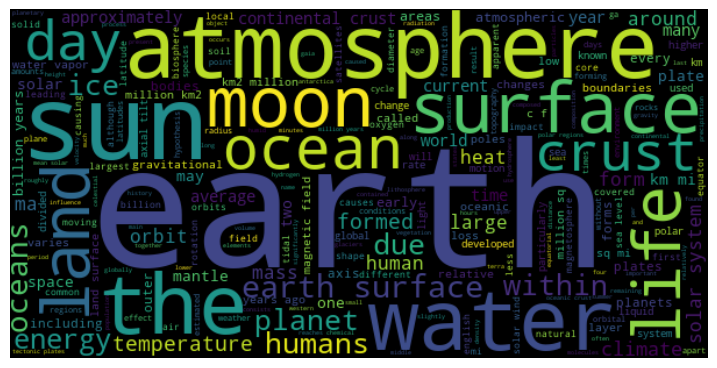

In [12]:
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [13]:
# Import the tokenizer
from nltk.tokenize import WordPunctTokenizer

# Get the text from the Earth wikipedia page
text = wikipedia_page('Earth')

# tokenize
tokens = WordPunctTokenizer().tokenize(text)

# print the 20 most commons tokens
print(Counter(tokens).most_common(20))

[('the', 643), (',', 579), ('.', 492), ('of', 362), ('and', 289), ('Earth', 259), ('is', 175), ('to', 166), ('s', 161), ("'", 160), ('in', 141), ('a', 135), ('(', 111), ('The', 98), ('-', 84), ('with', 73), ('by', 72), ('from', 67), ('as', 64), ('surface', 61)]


In [14]:
# example of character tokenization
char_tokens = [ c for c in text ]

# print the 20 most commons characters
print(Counter(char_tokens).most_common(10))

[(' ', 8995), ('e', 5292), ('t', 4165), ('a', 4074), ('i', 3255), ('o', 3202), ('r', 3059), ('n', 3024), ('s', 3000), ('h', 2213)]


In [15]:
from nltk import ngrams
from nltk.tokenize import WordPunctTokenizer

text = "How much wood would a woodchuck chuck if a woodchuck could chuck wood?"

# Tokenize
tokens = WordPunctTokenizer().tokenize(text)

# Only keep the bigrams 
bigrams = [w for w in  ngrams(tokens,n=2)]

print(bigrams)

[('How', 'much'), ('much', 'wood'), ('wood', 'would'), ('would', 'a'), ('a', 'woodchuck'), ('woodchuck', 'chuck'), ('chuck', 'if'), ('if', 'a'), ('a', 'woodchuck'), ('woodchuck', 'could'), ('could', 'chuck'), ('chuck', 'wood'), ('wood', '?')]


In [16]:
bi_tokens = ['_'.join(w) for w in bigrams]
print(bi_tokens)

['How_much', 'much_wood', 'wood_would', 'would_a', 'a_woodchuck', 'woodchuck_chuck', 'chuck_if', 'if_a', 'a_woodchuck', 'woodchuck_could', 'could_chuck', 'chuck_wood', 'wood_?']


In [17]:
# Import tokenizer, stemmer and stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

# Get the text from the Wikipedia Earth page
# (see chap 1 for the wikipedia_page() function)
text    = wikipedia_page('Earth').lower()

# Tokenize as usual
tokens  = WordPunctTokenizer().tokenize(text)

# Filter out stopwords
tokens = [tk for tk in tokens if tk not in stopwords.words('english')]

# Now, instantiate a stemmer
ps = PorterStemmer()

# and stem the tokens
stems   = [ps.stem(tk) for tk in tokens ]

In [18]:
import numpy as np
np.random.choice(stems, size = 10)

array([',', 'allow', 'uranium', 'attribut', 'cover', ')', "'", 'might',
       'african', 'crust'], dtype='<U15')

Stemming is a bit crude, and you want more than just the rough root of the word. For that, you use lemmatization.

In [19]:
import spacy

# Load the Spacy model
nlp = spacy.load("en_core_web_sm")

# And parse the sentence (taken from which movie?)
doc = nlp("Roads? Where we're going we don't need roads!")

# print the tokens
for token in doc:
   print(token)

Roads
?
Where
we
're
going
we
do
n't
need
roads
!


In [20]:
nlp = spacy.load("en_core_web_sm")

# parse the text
doc = nlp("All aboard! \t Train NXH123 departs from platform 22 at 3:16 sharp.")

# extract information on each token
for token in doc:
   print(token, token.is_space, token.is_punct, token.is_upper, token.is_digit)

All False False False False
aboard False False False False
! False True False False
	  True False False False
Train False False False False
NXH123 False False True False
departs False False False False
from False False False False
platform False False False False
22 False False False True
at False False False False
3:16 False False False False
sharp False False False False
. False True False False


In [21]:

nlp = spacy.load("en_core_web_sm")

doc = nlp("I came in and met with her teammates at the meeting.")

# print the lemma of each token
for token in doc:
   print(f"{token.text:>10}\t {token.lemma_} ")

         I	 I 
      came	 come 
        in	 in 
       and	 and 
       met	 meet 
      with	 with 
       her	 her 
 teammates	 teammate 
        at	 at 
       the	 the 
   meeting	 meeting 
         .	 . 


In [23]:
import nltk
nltk.download('universal_tagset')
text = nltk.word_tokenize("Grace me no grace, nor uncle me no uncle")
nltk.pos_tag(text,tagset='universal')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - 'C:\\Users\\david/nltk_data'
    - 'c:\\Users\\david\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data'
    - 'c:\\Users\\david\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data'
    - 'c:\\Users\\david\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data'
    - 'C:\\Users\\david\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:


nlp = spacy.load("en_core_web_sm")

# text from Alice in Wonderland
r = requests.get('http://www.gutenberg.org/files/11/11-0.txt')

# remove the footer and parse the text
doc = nlp(r.text.split("*** END")[0])

# Find all the 'persons' in the text
persons = []
# For each entity in the doc 
for ent in doc.ents:
    # if the entity is a person
    if ent.label_ == 'PERSON':
        # add to the list of persons
        persons.append(ent.text)

# note we could have written the last bit in one line with
persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

# list the 12 most common ones
Counter(persons).most_common(12)

[('Alice', 341),
 ('Queen', 54),
 ('Hatter', 53),
 ('Mouse', 27),
 ('â\x80\x9cIt', 9),
 ('Bill', 9),
 ('Lory', 7),
 ('Iâ\x80\x99d', 5),
 ('â\x80\x9cif', 5),
 ('Knave', 5),
 ('Gryphon', 5),
 ('William', 4)]

In [ ]:
rabbit_ner = [(ent.text, ent.label_) for ent in doc.ents if "Rabbit" in ent.text]
Counter(rabbit_ner).most_common(10)

[(('the White Rabbit', 'ORG'), 5),
 (('Rabbit', 'ORG'), 4),
 (('the White Rabbit', 'FAC'), 3),
 (('Rabbitâ\x80\x99s', 'ORG'), 2),
 (('Rabbitâ\x80\x99s', 'PERSON'), 1),
 (('The Rabbit Sends', 'WORK_OF_ART'), 1),
 (('the White Rabbit', 'WORK_OF_ART'), 1),
 (('the White\r\nRabbit', 'ORG'), 1),
 (('The White Rabbit', 'WORK_OF_ART'), 1)]

In [25]:
import pandas as pd

# consider the following set of phrases
corpus = [
   '2 cups of flour',
   'replace the flour',
   'replace the keyboard in 2 minutes',
   'do you prefer Windows or Mac',
   'the Mac has the most noisy keyboard',
]

# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# apply the vectorizer to the corpus
X = vectorizer.fit_transform(corpus)

# display the document-term matrix as a dataframe to show the tokens


vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

In [26]:
print(docterm)

   cups  do  flour  has  in  keyboard  mac  minutes  most  noisy  of  or  \
0     1   0      1    0   0         0    0        0     0      0   1   0   
1     0   0      1    0   0         0    0        0     0      0   0   0   
2     0   0      0    0   1         1    0        1     0      0   0   0   
3     0   1      0    0   0         0    1        0     0      0   0   1   
4     0   0      0    1   0         1    1        0     1      1   0   0   

   prefer  replace  the  windows  you  
0       0        0    0        0    0  
1       0        1    1        0    0  
2       0        1    1        0    0  
3       1        0    0        1    1  
4       0        0    2        0    0  


In [27]:
import pandas as pd
url = "https://raw.githubusercontent.com/alexisperrier/intro2nlp/master/data/brown_corpus_extract_humor_science_fiction.csv"
df = pd.read_csv(url)

print(df.topic.value_counts())

topic
humor              1052
science_fiction     948
Name: count, dtype: int64


In [28]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [35]:
def lemmatize(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

    return ' '.join(tokens)

In [36]:
text = "These are the good times, leave your cares behind."
lemmatize(text)

'good time leave care'

In [37]:
df['processed_text'] = df.text.apply(lambda txt : lemmatize(txt))

In [38]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# vectorize the lemmatized text
X = cv.fit_transform(df.processed_text)
print(X)

  (0, 2538)	1
  (0, 2568)	1
  (0, 783)	1
  (0, 3082)	1
  (0, 662)	1
  (0, 1342)	1
  (0, 1694)	1
  (0, 3301)	1
  (0, 1910)	1
  (0, 2846)	2
  (0, 2629)	1
  (0, 1167)	1
  (0, 360)	2
  (0, 4027)	1
  (0, 637)	1
  (0, 3876)	1
  (0, 4028)	1
  (1, 1714)	1
  (1, 1419)	1
  (1, 518)	1
  (1, 4323)	1
  (1, 665)	1
  (2, 1691)	1
  (2, 3312)	1
  (2, 431)	1
  :	:
  (1996, 2749)	1
  (1996, 1384)	1
  (1996, 4020)	1
  (1996, 3672)	1
  (1996, 872)	1
  (1997, 3990)	1
  (1998, 2486)	1
  (1998, 443)	1
  (1998, 4089)	1
  (1998, 246)	1
  (1998, 3631)	1
  (1998, 3596)	1
  (1998, 3487)	1
  (1998, 1330)	1
  (1998, 1762)	1
  (1998, 4883)	1
  (1998, 4412)	1
  (1998, 4747)	1
  (1999, 518)	1
  (1999, 2497)	1
  (1999, 1108)	1
  (1999, 1754)	1
  (1999, 3357)	1
  (1999, 1761)	1
  (1999, 4740)	1


In [39]:
# transform the topic from string to integer
df.loc[df.topic == 'humor', 'topic' ] = 0
df.loc[df.topic == 'science_fiction', 'topic' ] = 1

# define the target variable as 0 and 1s
y = df.topic.astype(int)

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Declare the model
clf = MultinomialNB()

# 2. Train the model
clf.fit(X, y)

# 3. Make predictions
yhat = clf.predict(X)

# 4. score
print("Accuracy: ",accuracy_score(y, yhat))

Accuracy:  0.9385


In [41]:
corpus = [
    '2 cups of flour',
    'replace the flour',
    'replace the keyboard in 2 minutes',
    'do you prefer Windows or Mac',
    'the Mac has the most noisy keyboard',
]

# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# apply the vectorizer to the corpus
X = vectorizer.fit_transform(corpus)

# display the document-term matrix
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

In [42]:
print(docterm)

       cups        do     flour       has        in  keyboard       mac  \
0  0.614189  0.000000  0.495524  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.609818  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.516374  0.416607  0.000000   
3  0.000000  0.420669  0.000000  0.000000  0.000000  0.000000  0.339393   
4  0.000000  0.000000  0.000000  0.405025  0.000000  0.326771  0.326771   

    minutes      most     noisy        of        or    prefer   replace  \
0  0.000000  0.000000  0.000000  0.614189  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.609818   
2  0.516374  0.000000  0.000000  0.000000  0.000000  0.000000  0.416607   
3  0.000000  0.000000  0.000000  0.000000  0.420669  0.420669  0.000000   
4  0.000000  0.405025  0.405025  0.000000  0.000000  0.000000  0.000000   

        the   windows       you  
0  0.000000  0.000000  0.000000  
1  0.506204  0.000000  0.00000

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/alexisperrier/intro2nlp/master/data/brown_corpus_extract_humor_science_fiction.csv"
df = pd.read_csv(url)

print(df.topic.value_counts())

topic
humor              1052
science_fiction     948
Name: count, dtype: int64


In [2]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [3]:
def lemmatize(text):
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc]

   return tokens

In [4]:
text = "These are the good times, leave your cares behind."
lemmatize(text)

['these',
 'be',
 'the',
 'good',
 'time',
 ',',
 'leave',
 'your',
 'care',
 'behind',
 '.']

In [5]:
def lemmatize(text):

   doc = nlp(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return tokens

In [6]:
text = "These are the good times, leave your cares behind."
lemmatize(text)

['good', 'time', 'leave', 'care']

In [7]:
def lemmatize(text):

   doc = nlp(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [8]:
text = "These are the good times, leave your cares behind."
lemmatize(text)

'good time leave care'

In [9]:
df['processed_text'] = df.text.apply(lambda txt : lemmatize(txt))

In [10]:
# importer et instancier le vectoriseur
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# vectoriser le texte lemmatisé
X = cv.fit_transform(df.processed_text)
print(X)

  (0, 2538)	1
  (0, 2568)	1
  (0, 783)	1
  (0, 3082)	1
  (0, 662)	1
  (0, 1342)	1
  (0, 1694)	1
  (0, 3301)	1
  (0, 1910)	1
  (0, 2846)	2
  (0, 2629)	1
  (0, 1167)	1
  (0, 360)	2
  (0, 4027)	1
  (0, 637)	1
  (0, 3876)	1
  (0, 4028)	1
  (1, 1714)	1
  (1, 1419)	1
  (1, 518)	1
  (1, 4323)	1
  (1, 665)	1
  (2, 1691)	1
  (2, 3312)	1
  (2, 431)	1
  :	:
  (1996, 2749)	1
  (1996, 1384)	1
  (1996, 4020)	1
  (1996, 3672)	1
  (1996, 872)	1
  (1997, 3990)	1
  (1998, 2486)	1
  (1998, 443)	1
  (1998, 4089)	1
  (1998, 246)	1
  (1998, 3631)	1
  (1998, 3596)	1
  (1998, 3487)	1
  (1998, 1330)	1
  (1998, 1762)	1
  (1998, 4883)	1
  (1998, 4412)	1
  (1998, 4747)	1
  (1999, 518)	1
  (1999, 2497)	1
  (1999, 1108)	1
  (1999, 1754)	1
  (1999, 3357)	1
  (1999, 1761)	1
  (1999, 4740)	1


In [11]:
# transformer le sujet de chaîne en entier
df.loc[df.topic == 'humor', 'topic' ] = 0
df.loc[df.topic == 'science_fiction', 'topic' ] = 1

# définir la variable cible comme 0 et 1
y = df.topic.astype(int)

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Déclarer le modèle
clf = MultinomialNB()

# 2. Entraîner le modèle
clf.fit(X, y)

# 3. Faire des prédictions
yhat = clf.predict(X)

# 4. Évaluer
print("Accuracy: ",accuracy_score(y, yhat))

Accuracy:  0.9385


In [13]:
corpus = [
    '2 tasses de farine',
    'remplacer la farine',
    'remplacer le clavier en 2 minutes',
    'préférez-vous Windows ou Mac',
    'le Mac est le plus bruyant clavier',
]

# importez et instanciez le vectoriseur
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# appliquez le vectoriseur au corpus
X = vectorizer.fit_transform(corpus)

# affichez la matrice document-termes
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

In [14]:
print(docterm)

    bruyant   clavier        de       en       est    farine        la  \
0  0.000000  0.000000  0.614189  0.00000  0.000000  0.495524  0.000000   
1  0.000000  0.000000  0.000000  0.00000  0.000000  0.531772  0.659118   
2  0.000000  0.405801  0.000000  0.50298  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
4  0.380542  0.307019  0.000000  0.00000  0.380542  0.000000  0.000000   

         le       mac  minutes        ou      plus  préférez  remplacer  \
0  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   0.000000   
1  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   0.531772   
2  0.405801  0.000000  0.50298  0.000000  0.000000  0.000000   0.405801   
3  0.000000  0.374105  0.00000  0.463693  0.000000  0.463693   0.000000   
4  0.614038  0.307019  0.00000  0.000000  0.380542  0.000000   0.000000   

     tasses      vous   windows  
0  0.614189  0.000000  0.000000  
1  0.000000  0.000000  0.000000  
2 

In [15]:
from textblob import TextBlob

text = '''C'était une évasion de justesse, dit Alice.
Très effrayée par le changement soudain.
Mais très heureuse de se retrouver encore en vie ;
'''

blob = TextBlob(text)
# Pour chaque phrase, calculer le sentiment (polarité) et l'importance (subjectivité)
for sentence in blob.sentences:
   print(sentence.raw, sentence.sentiment.polarity, sentence.sentiment.subjectivity)

C'était une évasion de justesse, dit Alice. 0.0 0.0
Très effrayée par le changement soudain. 0.0 0.0
Mais très heureuse de se retrouver encore en vie ; 0.0 0.0


In [23]:
from textblob import TextBlob


text = '''It was a close escape, said Alice.
Very frightened by the sudden change.
But very happy to find herself still alive;
'''

blob = TextBlob(text)
for sentence in blob.sentences:
    print(sentence.raw, sentence.sentiment.polarity, sentence.sentiment.subjectivity)

It was a close escape, said Alice. 0.0 0.0
Very frightened by the sudden change. 0.1 0.4
But very happy to find herself still alive; 0.55 0.7


In [42]:
from textblob_fr import PatternTagger, PatternAnalyzer
from textblob import Blobber
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

text = '''C'était une évasion de justesse, dit Alice.
Très effrayée par le changement soudain.
Mais très heureuse de se retrouver encore en vie ;
'''

blob = TextBlob(text)

# Pour chaque phrase, calculer le sentiment (polarité) et l'importance (subjectivité)
for sentence in blob.sentences:
   print("----------------------------------")
   print(sentence.raw)
   print(tb((' '.join(sentence))).sentiment[0])
   print(tb((' '.join(sentence))).sentiment[1])



----------------------------------
C'était une évasion de justesse, dit Alice.
0.0
0.0
----------------------------------
Très effrayée par le changement soudain.
0.0
0.0
----------------------------------
Mais très heureuse de se retrouver encore en vie ;
0.0
0.0


In [34]:
from textblob import TextBlob

text = '''C'était une évasion de justesse, dit Alice.
Très effrayée par le changement soudain.
Mais très heureuse de se retrouver encore en vie ;
'''

blob = TextBlob(text)
print(blob.detect_language())  # Pour vérifier la détection de la langue

# Réanalyser avec une détection de langue forcée
blob = TextBlob(text, pos_tagger="fr")
for sentence in blob.sentences:
    print(sentence.raw, sentence.sentiment.polarity, sentence.sentiment.subjectivity)

AttributeError: 'str' object has no attribute 'detect_language'

In [16]:
print(blob)

C'était une évasion de justesse, dit Alice.
Très effrayée par le changement soudain.
Mais très heureuse de se retrouver encore en vie ;



In [18]:
def polarity(text):

   polarity_score = TextBlob(text).sentences[0].sentiment.polarity

   print(f"{text} \t {polarity_score}")


# phrase originale, positive
polarity("Très effrayée par le changement.")

Très effrayée par le changement. 	 0.0


In [19]:
# enlever 'très', vous obtenez neutre
polarity("Effrayée par le changement.")

Effrayée par le changement. 	 0.0


In [20]:
# et si on change l'adjectif
polarity("Heureuse du changement.")

Heureuse du changement. 	 0.0


In [21]:
# ou ajoutez simplement le mot 'très'
polarity("Très effrayée par le changement.")

Très effrayée par le changement. 	 0.0


In [47]:
# importer la bibliothèque et instancier le client
from google.cloud import language_v1
# spécifiez le contenu que vous souhaitez analyser
document = {
    "content": "Alice était très effrayée." , 
    "type_": language_v1.Document.Type.PLAIN_TEXT, 
    "language": "en"
}


client = language_v1.LanguageServiceClient()

# envoyer votre requête
response = client.analyze_sentiment(
    request = {
        'document': document, 
        'encoding_type': language_v1.EncodingType.UTF8
    }
)
# Cela renvoie les scores de polarité et d'intensité du sentiment
print("sentiment score:", response.document_sentiment.score)
print("sentiment magnitude:", response.document_sentiment.magnitude)

ModuleNotFoundError: No module named 'google.cloud'